Clase 3 - Detección

Karen Geraldine Martinez Moreno
Cód.: 20221195001

In [3]:
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install -q -e .
!pip install supervision
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install kagglehub
!pip install segment-anything
!pip install segment-anything opencv-python matplotlib torch torchvision
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO
!pip install -e .
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P checkpoints

  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-86qxwgt4
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-86qxwgt4
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 856dde20aee659246248e20734ef9ba5214f5e44
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 27.9 MB/s eta 0:00:00
  Created wheel for groundingdino: filename=groundingdino-0.1.0-cp310-cp310-linux_x86_64.whl size=3045827 sha256=5a12b02215f5aaccba3c176fc1509cd86d141ae8f0ea4eb9d11b8a1a5477e8e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-k97biiwo/wheels/6b/06/d7/b57f601a4df56af41d262a5b1b496359b13c323bf5ef0434b2
Successfully built groundingdino
ERROR: file:///content does not appear to

In [4]:
from google.colab import drive

# Definir el directorio/ruta
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Clase3_Deteccion"

import os
if not os.path.exists(dir):
    os.makedirs(dir)

Mounted at /content/drive


In [9]:
!pip install kagglehub
import kagglehub
from shutil import copytree
import os


# Descargar el dataset de perros y gatos
path = kagglehub.dataset_download("andresperpinanreyes/perros-y-gatos-100-imagenes-entrenamiento")

# Definir el directorio de destino
target_dir = os.path.join(dir, "perros_y_gatos")
copytree(path, target_dir, dirs_exist_ok=True)
print(f"Dataset descargado en: {target_dir}")



Dataset descargado en: /content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos


In [6]:
!pwd
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO/
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights


/content/GroundingDINO
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO/GroundingDINO
/content/GroundingDINO


In [7]:
!pwd
!dir

#Se carga el modelo GroundingDINO y sus pesos
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

/content/GroundingDINO
build	     Dockerfile        groundingdino	       LICENSE		 setup.py
checkpoints  docker_test.py    GroundingDINO	       README.md	 test.ipynb
demo	     environment.yaml  groundingdino.egg-info  requirements.txt  weights


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [10]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import os
from tqdm import tqdm
from PIL import Image

#Se carga el modelo GroundingDINO
model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

# Parámetros
text = "Dog"  # Texto en el caption
BOX_THRESHOLD = 0.22  # Más cajas
TEXT_THRESHOLD = 0.10  # Más texto

# Rutas de entrada y salida
input_folder = "/content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos/perros"
output_folder = "/content/drive/MyDrive/Clase3_Deteccion/deteccion"
os.makedirs(output_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg"))]

# Procesar imágenes
for filename in tqdm(all_files):
    if filename.endswith((".jpg")):
        image_path = os.path.join(input_folder, filename)
        try:
            # Cargar imagen y preprocesar
            image_source, image_tensor = load_image(image_path)

            # Realizar la predicción (ahora incluyendo 'caption')
            boxes, logits, phrases = predict(model=model,
                                              image=image_tensor,
                                              caption=text,  # Agregado el argumento 'caption'
                                              box_threshold=BOX_THRESHOLD,
                                              text_threshold=TEXT_THRESHOLD,
                                              device="cuda")  # Cambiar a 'cuda' si tienes GPU

            # Anotar la imagen
            annotated_frame = annotate(image_source=image_source,
                                       boxes=boxes,
                                       logits=logits,
                                       phrases=phrases)

            # Guardar la imagen anotada
            output_image_path = os.path.join(output_folder, filename)
            annotated_pil = Image.fromarray(annotated_frame)
            annotated_pil.save(output_image_path)

        except Exception as e:
            print(f"Error {filename}: {e}")

print(f"Imagenes guardadas en: {output_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 61/61 [00:25<00:00,  2.40it/s]

Imagenes guardadas en: /content/drive/MyDrive/Clase3_Deteccion/deteccion


In [12]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import os
from tqdm import tqdm
from PIL import Image

# Cargar el modelo
model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

# Parámetros para la detección
text = "Dog"  # Texto caption
BOX_THRESHOLD = 0.22  # Más cajas
TEXT_THRESHOLD = 0.10  # Más texto

# Directorios de entrada y salida
input_folder = "/content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos/perros"
output_folder = "/content/drive/MyDrive/Clase3_Deteccion/deteccion"
labels_folder = "/content/drive/MyDrive/Clase3_Deteccion/etiquetasYOLO"  # Etiquetas YOLO
os.makedirs(output_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg"))]

# Procesar imágenes
for filename in tqdm(all_files):
    if filename.endswith((".jpg")):
        image_path = os.path.join(input_folder, filename)
        try:
            # Cargar imagen y preprocesar
            image_source, image_tensor = load_image(image_path)

            # Realizar la predicción (ahora incluyendo 'caption')
            boxes, logits, phrases = predict(model=model,
                                              image=image_tensor,
                                              caption=text,
                                              box_threshold=BOX_THRESHOLD,
                                              text_threshold=TEXT_THRESHOLD,
                                              device="cuda")  #  GPU

            # Anotar la imagen
            annotated_frame = annotate(image_source=image_source,
                                       boxes=boxes,
                                       logits=logits,
                                       phrases=phrases)

            # Guardar la imagen anotada
            output_image_path = os.path.join(output_folder, filename)
            annotated_pil = Image.fromarray(annotated_frame)
            annotated_pil.save(output_image_path)

            # Guardar etiquetas en formato YOLO inmediatamente después de la predicción
            height, width, _ = image_source.shape  # Obtener dimensiones de la imagen
            label_file_path = os.path.join(labels_folder, f"{os.path.splitext(filename)[0]}.txt")

            with open(label_file_path, 'w') as label_file:
                for box in boxes:
                    x_min, y_min, x_max, y_max = box.tolist()  # Convertir a lista

                    # Calcular el centro y dimensiones normalizadas
                    x_center = (x_min + x_max) / 2 / width
                    y_center = (y_min + y_max) / 2 / height
                    box_width = (x_max - x_min) / width
                    box_height = (y_max - y_min) / height

                    # Escribir la etiqueta (asumiendo que 'Dog' es class_id 0)
                    label_file.write(f"0 {x_center} {y_center} {box_width} {box_height}\n")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print(f"Annotated images saved in: {output_folder}")
print(f"YOLO labels saved in: {labels_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 61/61 [00:23<00:00,  2.57it/s]

Annotated images saved in: /content/drive/MyDrive/Clase3_Deteccion/deteccion
YOLO labels saved in: /content/drive/MyDrive/Clase3_Deteccion/etiquetasYOLO


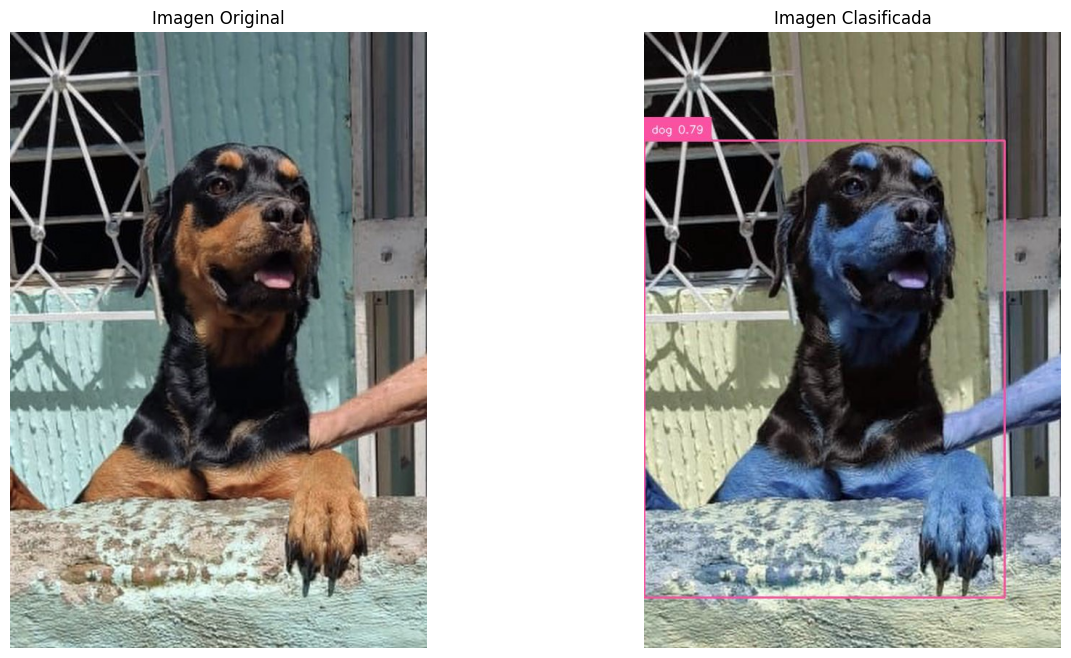

YOLO labels for /content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos/perros/perro (29).jpg:
0 0.001129314225517499 0.0007600624746871445 0.000753394039250417 0.00023018821792782478



In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths, se toma como ejemplo la perro (29)
original_image_path = "/content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos/perros/perro (29).jpg"
classified_image_path = "/content/drive/MyDrive/Clase3_Deteccion/deteccion/perro (29).jpg"


# Mostrar imagenes en cada lado
def display_images(original_path, classified_path):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Imagen original
    img_original = mpimg.imread(original_path)
    axes[0].imshow(img_original)
    axes[0].set_title("Imagen Original")
    axes[0].axis('off')


    # Imagen Clasificada
    img_classified = mpimg.imread(classified_path)
    axes[1].imshow(img_classified)
    axes[1].set_title("Imagen Clasificada")
    axes[1].axis('off')


    plt.show()


# Mostrar imagenes
display_images(original_image_path, classified_image_path)


# Etiquetas YOLO
yolo_label_path = "/content/drive/MyDrive/Clase3_Deteccion/etiquetasYOLO/perro (29).txt"
try:
  with open(yolo_label_path, 'r') as f:
      print(f"YOLO labels for {original_image_path}:")
      print(f.read())
except FileNotFoundError:
  print(f"YOLO label file not found at: {yolo_label_path}")

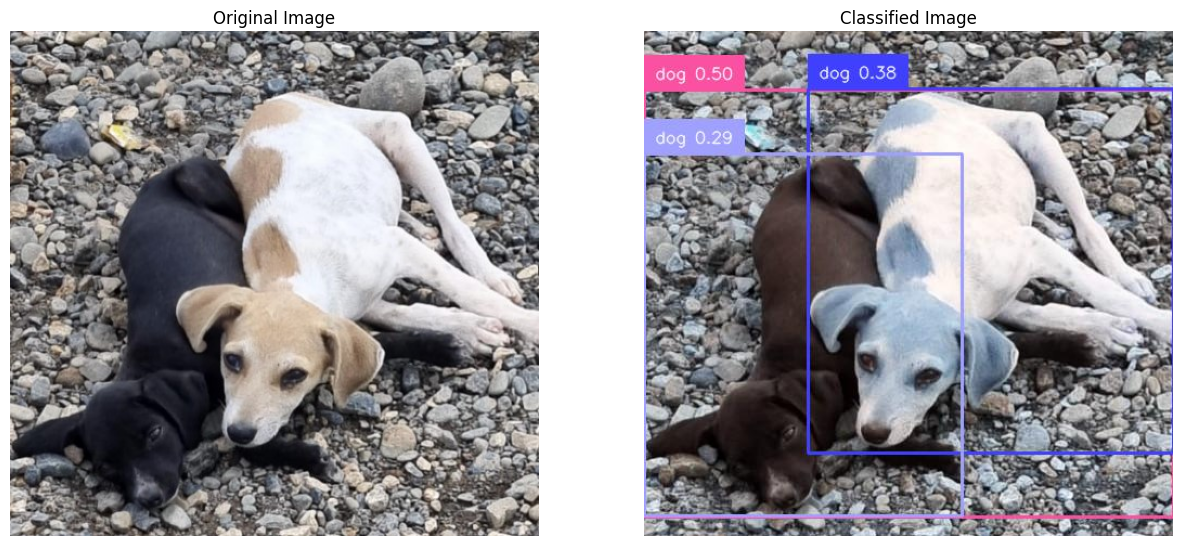

YOLO labels for /content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos/perros/perro (6).jpg:
0 0.0015373585409805422 0.0014862093930592352 0.0010233440848647572 0.0006585984526785658
0 0.001377770890955065 0.0012819890428510347 6.933266022166268e-05 0.0005238262113071818
0 0.0009249107698436643 0.00141616082498444 0.0006132996106734041 0.00024512985745213064



In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image_path = "/content/drive/MyDrive/Clase3_Deteccion/perros_y_gatos/perros/perro (6).jpg"
classified_image_path = "/content/drive/MyDrive/Clase3_Deteccion/deteccion/perro (6).jpg"


def display_images(original_path, classified_path):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    img_original = mpimg.imread(original_path)
    axes[0].imshow(img_original)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    img_classified = mpimg.imread(classified_path)
    axes[1].imshow(img_classified)
    axes[1].set_title("Classified Image")
    axes[1].axis('off')


    plt.show()

display_images(original_image_path, classified_image_path)


yolo_label_path = "/content/drive/MyDrive/Clase3_Deteccion/etiquetasYOLO/perro (6).txt"
try:
  with open(yolo_label_path, 'r') as f:
      print(f"YOLO labels for {original_image_path}:")
      print(f.read())
except FileNotFoundError:
  print(f"YOLO label file not found at: {yolo_label_path}")

In [15]:
# Verificar dimensiones de la imagen antes de la predicción
print(f"Image shape: {image_tensor.shape}")

# Verificar las dimensiones de las cajas
print(f"Boxes shape: {boxes.shape}")

Image shape: torch.Size([3, 864, 800])
Boxes shape: torch.Size([1, 4])
